<a href="https://colab.research.google.com/github/Puspita0707/Stock-Market-Prediction/blob/main/Copy_of_MLlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *TOPIC: Predicting Stock Market Returns Using Macroeconomic Indicators*

Here, The dataset is imported with required python libraries, and the dataset is read

In [ ]:
#importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/ie_data.csv')


\We now use data.head to show the columns and rows.

In [ ]:
data.head(20)

,Date,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,...,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1871.01,4.44,0.26,0.4,12.46,1871.04,5.32,103.43,6.06,103.43,...,NaN,1.0,1.00,13.06%,9.25%,3.81%,NaN,NaN,NaN,NaN
8,1871.02,4.50,0.26,0.4,12.84,1871.13,5.32,101.72,5.88,102.21,...,NaN,1.0,0.97,13.09%,9.46%,3.62%,NaN,NaN,NaN,NaN
9,1871.03,4.61,0.26,0.4,13.03,1871.21,5.33,102.68,5.79,103.66,...,NaN,1.0,0.96,13.10%,9.62%,3.48%,NaN,NaN,NaN,NaN


In [ ]:
#to read the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 25 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Date                                                                       1817 non-null   float64
 1   S&P Comp.                                                                  1817 non-null   float64
 2   Dividend                                                                   1815 non-null   float64
 3   Earnings                                                                   1812 non-null   float64
 4     Consumer Price Index CPI                                                 1817 non-null   float64
 5   Date Fraction                                                              1817 non-null   float64
 6   Long Interest Rate GS10                                 

Information about the columns

In [ ]:
data.columns

Index(['Date', 'S&P Comp.', 'Dividend', 'Earnings',
       '  Consumer Price Index CPI', 'Date Fraction  ',
       'Long Interest Rate GS10', 'Real Price', 'Real Dividend',
       ' Real Total Return Price ', 'Real Earnings',
       ' Real TR Scaled Earnings ',
       'Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE', 'Unnamed: 13',
       'Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE',
       'Excess CAPE Yield', 'Monthly Total Bond Returns',
       'Real Total Bond Returns', '10 Year Annualized Stock Real Return',
       '10 Year Annualized Bonds  Real Return',
       'Real 10 Year Excess Annualized  Returns', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [ ]:
data.shape


(2450, 25)

# Checking the null values

Here, we are calculating the missing value percentage for ROWS.

In [ ]:
# We are Calculating the percentage of missing values in each row
missing_percentage = data.isnull().sum(axis=1) / data.shape[1] * 100
rows_above_30_null = data[missing_percentage > 30]
rows_above_30_null.shape
data.isnull().sum()/data.shape[1]*100

,0
Date,2532.0
S&P Comp.,2532.0
Dividend,2540.0
Earnings,2552.0
Consumer Price Index CPI,2532.0
Date Fraction,2532.0
Long Interest Rate GS10,2532.0
Real Price,2532.0
Real Dividend,2540.0
Real Total Return Price,2532.0


Here, we are calculating the missing value percentage for COLUMNS

In [ ]:
#for column
missing_percentage = data.isnull().sum(axis=1) / data.shape[0] * 100
columns_above_30_null = data[missing_percentage > 30]

data.isnull().sum()/data.shape[0]*100


,0
Date,25.836735
S&P Comp.,25.836735
Dividend,25.918367
Earnings,26.040816
Consumer Price Index CPI,25.836735
Date Fraction,25.836735
Long Interest Rate GS10,25.836735
Real Price,25.836735
Real Dividend,25.918367
Real Total Return Price,25.836735


Here, We drop those columns, which has >30% of null values.

In [ ]:
data = data.dropna(axis=1, thresh=0.7 * len(data))
data.shape

(2450, 14)

# *Missing values handeling:*
1. We calculate the missing values per column
2. Identifying columns more than 30%
3. Drop those columns more than 30%


In [ ]:
#Missing Value Handling

missing_percentage_cols = data.isnull().sum() / len(data) * 100
print("Percentage of missing values per column:\n", missing_percentage_cols)

# Identify columns with more than 30% missing values
columns_above_30_null = missing_percentage_cols[missing_percentage_cols > 30]
print("\nColumns with more than 30% missing values:\n", columns_above_30_null)


# Drop columns with more than 30% missing values
data = data.drop(columns=columns_above_30_null.index)

Percentage of missing values per column:
 Date                          25.836735
S&P Comp.                     25.836735
Dividend                      25.918367
Earnings                      26.040816
  Consumer Price Index CPI    25.836735
Date Fraction                 25.836735
Long Interest Rate GS10       25.836735
Real Price                    25.836735
Real Dividend                 25.918367
 Real Total Return Price      25.836735
Real Earnings                 26.040816
 Real TR Scaled Earnings      26.040816
Monthly Total Bond Returns    25.877551
Real Total Bond Returns       25.836735
dtype: float64

Columns with more than 30% missing values:
 Series([], dtype: float64)


Here, we fill the null values with mode, since its a Categorical columns.

In [ ]:

# Filling remaining missing values with the mode

# Filling only categorical columns with mode
for col in data.select_dtypes(include=['object']):
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill numerical columns with median
for col in data.select_dtypes(exclude=['object']):
  data[col] = data[col].fillna(data[col].median())

In [ ]:
#treating the categorical values through mode
data_filled = data.fillna(data.mode().iloc[0])
data_filled.isnull().sum()


,0
Date,0
S&P Comp.,0
Dividend,0
Earnings,0
Consumer Price Index CPI,0
Date Fraction,0
Long Interest Rate GS10,0
Real Price,0
Real Dividend,0
Real Total Return Price,0


# *Outliers:*: for showing outliers, we use boxplot to detect Skewness

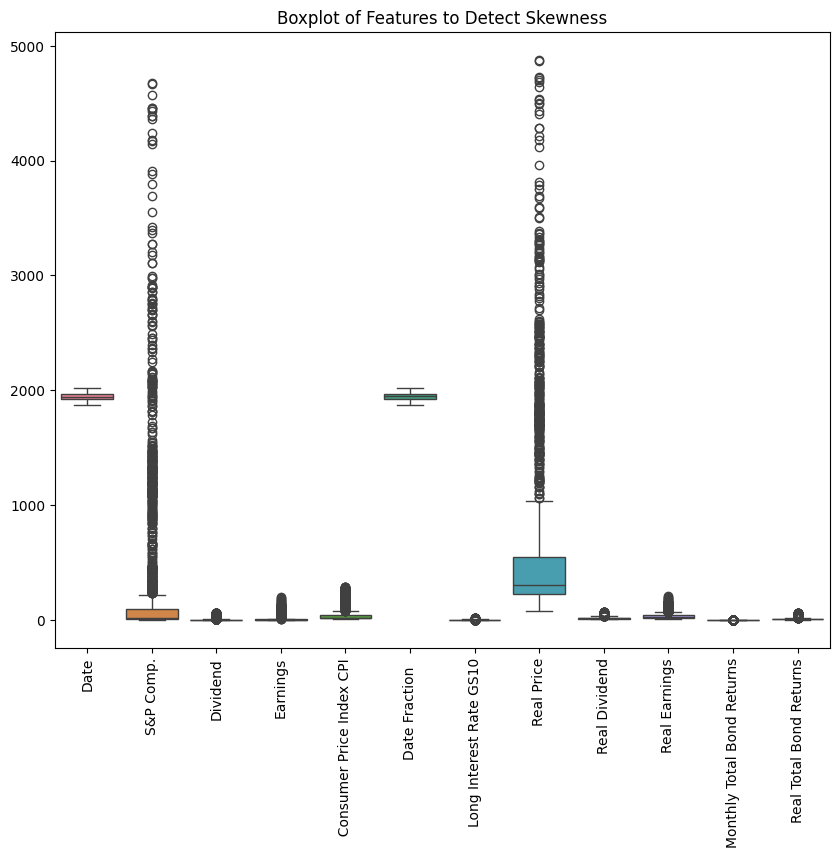

In [ ]:
#for showing outliers

import seaborn as sns
plt.figure(figsize=(10, 8))

sns.boxplot(data)
plt.xticks(rotation=90)
plt.title("Boxplot of Features to Detect Skewness")
plt.show()


In the above Boxplot diagram, We can see that, the diagram is rightly skewed for most features.
We can see that in case of "S&P Comp", "Real price" etc, the right whisker is larger.

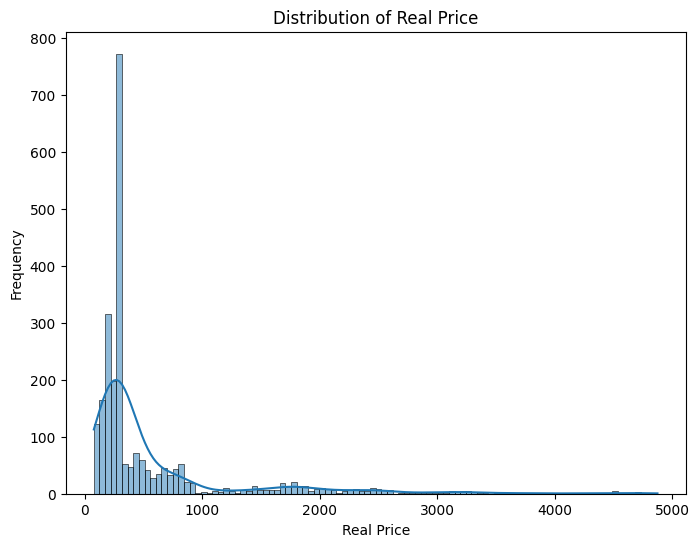

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Real Price'], kde=True)  # kde=True for kernel density estimate
plt.title("Distribution of Real Price")
plt.xlabel("Real Price")
plt.ylabel("Frequency")
plt.show()

# *Treating Outliers:*
For treating outliers, here we used IQR technique, for this select only numerical columns

In [ ]:
#Treating the outliers through the method of IQR


# Selecting  only numerical columns
num_cols = data.select_dtypes(include=['number'])

# Compute Q1, Q3, and IQR
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Defining  bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_cleaned = data[~((num_cols < lower_bound) | (num_cols > upper_bound)).any(axis=1)]

# Display results
print(f"Original shape: {data.shape}")
print(f"Shape after outlier removal: {data_cleaned.shape}")


Original shape: (2450, 14)
Shape after outlier removal: (1590, 14)


Describing the cleaned data

In [ ]:
(data_cleaned.describe())

,Date,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real Earnings,Monthly Total Bond Returns,Real Total Bond Returns
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.0,1590.000000
mean,1928.697642,15.751736,0.742849,1.234547,16.833258,1929.205692,3.622170,273.122119,13.228214,21.316113,1.0,8.951956
std,24.953561,14.015836,0.458274,0.864123,6.451694,25.006130,0.616045,110.757631,3.515185,7.290809,0.0,3.355487
min,1871.010000,2.730000,0.180000,0.160000,6.280000,1871.040000,2.020000,78.590000,5.790000,5.550000,1.0,0.960000
25%,1908.022500,8.052500,0.420000,0.580000,9.990000,1908.142500,3.422500,202.665000,10.170000,15.632500,1.0,6.380000
50%,1946.090000,17.495000,0.890000,1.480000,20.800000,1946.710000,3.810000,302.080000,15.370000,25.130000,1.0,10.650000
75%,1946.090000,17.530000,0.890000,1.480000,20.800000,1946.710000,3.810000,302.080000,15.370000,25.130000,1.0,10.650000
max,1971.110000,103.800000,3.080000,5.690000,40.900000,1971.870000,5.810000,853.760000,25.520000,48.720000,1.0,16.090000


# *Scaling technique:*
For scaling the data, we use Standardscalar

In [ ]:

#Standardization (Z-score normalization):
from sklearn.preprocessing import StandardScaler

# Using data_cleaned directly instead of data.data_cleaned
numerical_features = data_cleaned.select_dtypes(include=['number'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_data = pd.DataFrame(scaled_features, columns=numerical_features.columns)
categorical_features = data_cleaned.select_dtypes(include=['object'])
data_scaled = pd.concat([scaled_data, categorical_features], axis=1)

In [ ]:
scaled_data.head()

,Date,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real Earnings,Monthly Total Bond Returns,Real Total Bond Returns
0,0.697208,0.126915,0.321199,0.284138,0.615031,0.700221,0.304993,0.261535,0.609487,0.523273,0.0,0.506209
1,0.697208,0.126915,0.321199,0.284138,0.615031,0.700221,0.304993,0.261535,0.609487,0.523273,0.0,0.506209
2,0.697208,0.126915,0.321199,0.284138,0.615031,0.700221,0.304993,0.261535,0.609487,0.523273,0.0,0.506209
3,0.697208,0.126915,0.321199,0.284138,0.615031,0.700221,0.304993,0.261535,0.609487,0.523273,0.0,0.506209
4,0.697208,0.126915,0.321199,0.284138,0.615031,0.700221,0.304993,0.261535,0.609487,0.523273,0.0,0.506209


# ***Recalculating PCA on cleaned data***
STEPS:
1. Getting the numerical features from cleaned data
2. Then, Standardise the features
3. Then, calculate the Covariance matrix
4. Then, We perform the eigenvalues and eigenvectors
5. We sort eigenvectors and eigenvalues
6. then we select top 2 PCs




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# recalculating them on the cleaned data:
# 1. Get the numerical features from data_cleaned
numerical_features_cleaned = data_cleaned.select_dtypes(include=['number']).drop(columns=['Real Price'])

# 2. Standardize the cleaned numerical features
scaler = StandardScaler()
scaled_features_cleaned = scaler.fit_transform(numerical_features_cleaned)

# 3. Calculate covariance matrix
covariance_matrix_cleaned = np.cov(scaled_features_cleaned.T)

# 4. Perform eigendecomposition
eigenvalues_cleaned, eigenvectors_cleaned = np.linalg.eig(covariance_matrix_cleaned)

# 5. Sort eigenvalues and eigenvectors in descending order
sorted_indices_cleaned = np.argsort(eigenvalues_cleaned)[::-1]
eigenvalues_cleaned = eigenvalues_cleaned[sorted_indices_cleaned]
eigenvectors_cleaned = eigenvectors_cleaned[:, sorted_indices_cleaned]
print(eigenvalues_cleaned)

# 6. Select top k eigenvectors
top_k = 2
pca_eigenvectors_cleaned = eigenvectors_cleaned[:, :top_k]
print(pca_eigenvectors_cleaned)

# 7. Project cleaned data onto the new principal components
pca_data_cleaned = np.dot(scaled_features_cleaned, pca_eigenvectors_cleaned)
data_pca_cleaned = pd.DataFrame(pca_data_cleaned, columns=['PC1', 'PC2'])
print(data_pca_cleaned)



[7.31533852e+00 1.55793092e+00 5.34227368e-01 3.23058126e-01
 1.66611971e-01 7.73231678e-02 2.08031738e-02 9.31124869e-03
 1.65729368e-03 3.14729409e-05 0.00000000e+00]
[[ 0.34249529 -0.23199412]
 [ 0.31252972  0.27200253]
 [ 0.35174538  0.16936131]
 [ 0.34574575  0.1902807 ]
 [ 0.34473001  0.03225001]
 [ 0.34238885 -0.23149147]
 [-0.01609237  0.70931974]
 [ 0.33654865  0.1024374 ]
 [ 0.33373181  0.14142061]
 [ 0.          0.        ]
 [ 0.2842313  -0.46802487]]
          PC1       PC2
0     1.46017 -0.045168
1     1.46017 -0.045168
2     1.46017 -0.045168
3     1.46017 -0.045168
4     1.46017 -0.045168
...       ...       ...
1585  1.46017 -0.045168
1586  1.46017 -0.045168
1587  1.46017 -0.045168
1588  1.46017 -0.045168
1589  1.46017 -0.045168

[1590 rows x 2 columns]


# *feature reduction using multi-Dimension scaling technique*

In [ ]:
#now we try reducing features using Multidimensionality Reduction
# Apply MDS (reducing to 2D for visualization)
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
mds_transformed = mds.fit_transform(scaled_data)

In [ ]:
# Convert to DataFrame
mds_data = pd.DataFrame(mds_transformed, columns=['MDS1', 'MDS2'])

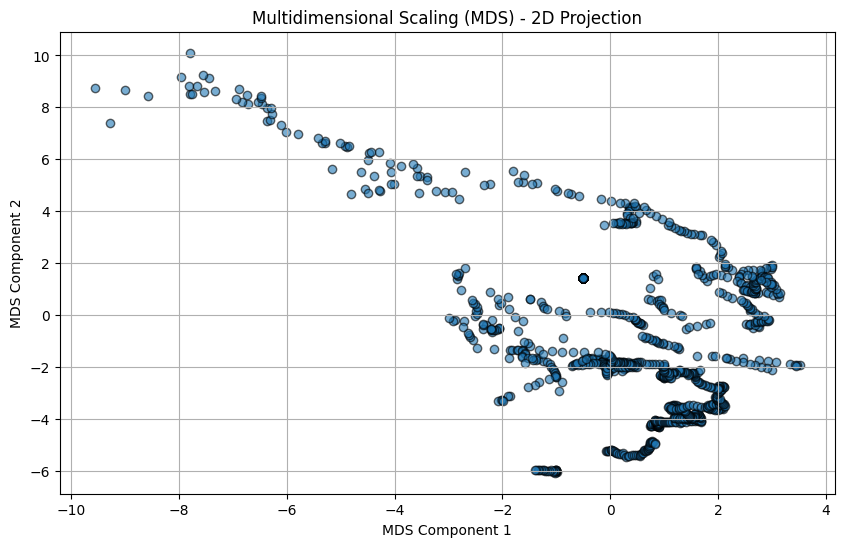

In [ ]:
#Now we plot it in the 2D transformation
plt.figure(figsize=(10, 6))
plt.scatter(mds_data["MDS1"], mds_data["MDS2"], alpha=0.6, edgecolors="k")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Multidimensional Scaling (MDS) - 2D Projection")
plt.grid(True)
plt.show()

# *For Training and testing the data*

In [ ]:
#Now we use data_pca_cleaned and data_cleaned['Real Price'] for splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_pca_cleaned, data_cleaned['Real Price'], test_size=0.2, random_state=42)

# --- Rest of your code remains the same ---
# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
#evaluate performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Importing mean_absolute_error

mean_squared_error(y_test, y_pred)
mean_absolute_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.7064681119215828

R² (coefficient of determination) measures how well your model explains the variance in the target variable (stock returns in your case).

R² Score = 0.706, which means that:

The value ranges from 0 to 1:
1. 1.0 (100%) → Its a Perfect model (all variance is explained).
2. 0.706 (70.6%) → My model explains 70.6% of the variance in stock returns, which is considered fairly good.
3. 0 or negative values → Poor model, no meaningful predictions.

# *Using random forest, R square score*


In [ ]:
#using Randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

#train the model
# Change n_estimators to an integer value greater than or equal to 1
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Example: Using 100 trees
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
accuracy_score = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", accuracy_score)

R-squared (R2) Score: 0.9571904580816323


Trying the model in test data, which gives 95% od accuracy, which means my model also performs well on unseen data but is slightly worse than on training data.

In [ ]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, y_pred)
print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")


Train R²: 0.997, Test R²: 0.957


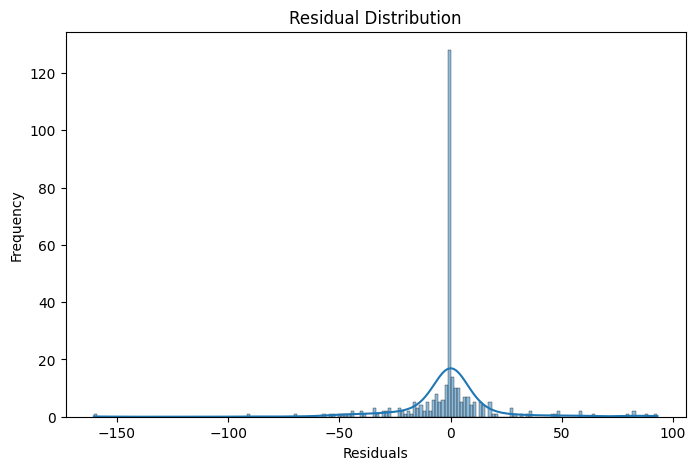

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# ***(Hyperparameter tuning)Random Search CV***

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [4, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [4, 10], 'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

# Create a RandomForestRegressor object and assign it to rf
rf = RandomForestRegressor()

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 431, in fit
    raise ValueError(
ValueError:

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [4, 10],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rf_grid.best_score_

0.9637602859507288

# *For checking which features are important*

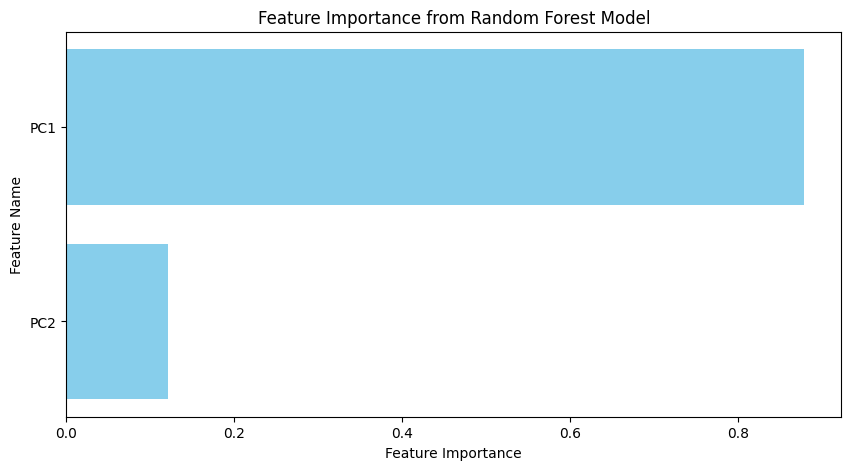

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Instead of original data columns, use columns from pca data
features = data_pca_cleaned.columns

# Convert to DataFrame
importance_data = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_data = importance_data.sort_values(by="Importance", ascending=False)  # Sort by importance

# Plot
plt.figure(figsize=(10, 5))
plt.barh(importance_data["Feature"], importance_data["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance from Random Forest Model")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()


# *Extracting the PC1 features(top features)*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA  # Import PCA
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Then we Create and fit PCA with the desired number of components (e.g-2)
pca = PCA(n_components=2)

#we Ensure all columns are numeric before applying PCA ---
# 1.convert to numeric
for col in data_scaled.select_dtypes(include=['object']).columns:
    try:
        data_scaled[col] = pd.to_numeric(data_scaled[col].str.replace(',', '').str.strip())
    except ValueError:
        print(f"Warning: Could not convert column '{col}' to numeric. Check its values.")  # Print warning for problematic columns
        pass  # Skip columns that can't be converted

# 2. Select only numeric features for PCA
numeric_data_scaled = data_scaled.select_dtypes(include=['number'])

# --- Impute remaining NaN values with the mean ---
imputer = SimpleImputer(strategy='mean')  # Or we use 'median'
numeric_data_scaled_imputed = imputer.fit_transform(numeric_data_scaled)

# 3. Now fit PCA on the imputed numeric data
pca.fit(numeric_data_scaled_imputed)

# Now you can access pca.components_
pca_components = pd.DataFrame(pca.components_, columns=numeric_data_scaled.columns)

# We Get the top contributing features for PC1
pc1_loadings = pca_components.iloc[0]  # PC1 is the first row

# Sort by absolute value to see the most influential features
pc1_top_features = pc1_loadings.abs().sort_values(ascending=False)
print("Top Features Contributing to PC1:")
print(pc1_top_features.head(10))


Top Features Contributing to PC1:
 Real Total Return Price      0.998290
 Real TR Scaled Earnings      0.058448
Date Fraction                 0.000017
Date                          0.000017
  Consumer Price Index CPI    0.000017
Real Dividend                 0.000015
Real Total Bond Returns       0.000014
Real Earnings                 0.000014
Dividend                      0.000012
Earnings                      0.000012
Name: 0, dtype: float64


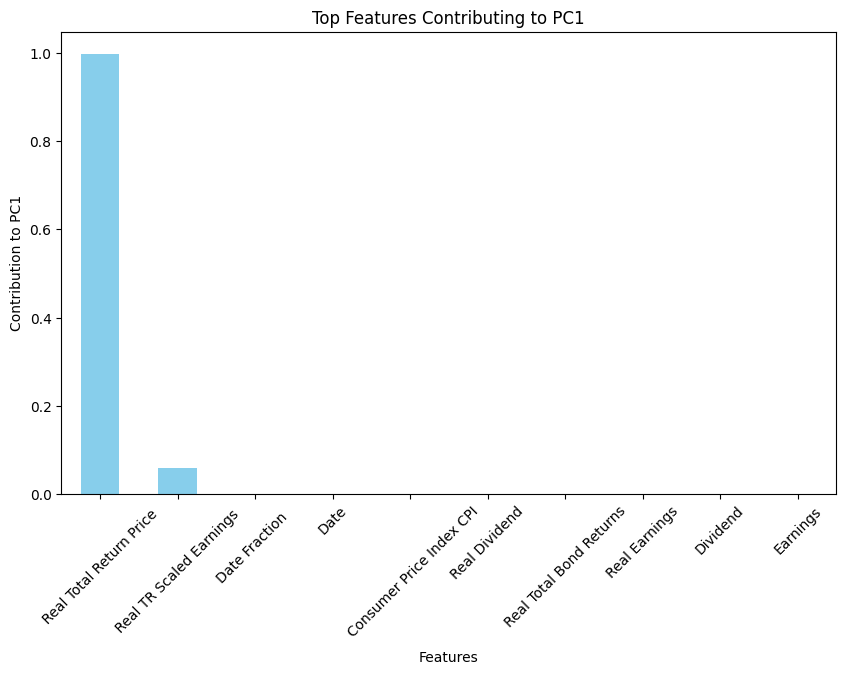

In [ ]:
#For Visualising

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pc1_top_features.head(10).plot(kind="bar", color="skyblue")  # Plot top 10
plt.xlabel("Features")
plt.ylabel("Contribution to PC1")
plt.title("Top Features Contributing to PC1")
plt.xticks(rotation=45)
plt.show()

# *Checking if "Real Total Return Price" and "Real TR Scaled Earnings" Correlates*

Index(['Date', 'S&P Comp.', 'Dividend', 'Earnings',
       '  Consumer Price Index CPI', 'Date Fraction  ',
       'Long Interest Rate GS10', 'Real Price', 'Real Dividend',
       ' Real Total Return Price ', 'Real Earnings',
       ' Real TR Scaled Earnings ', 'Monthly Total Bond Returns',
       'Real Total Bond Returns'],
      dtype='object')
[[ 1.00062933  0.61526034  0.781328    0.75071294  0.89396769  1.0005942
  -0.19358379  0.8003662   0.76816451  0.          0.90235878]
 [ 0.61526034  1.00062933  0.94252458  0.93176547  0.75496643  0.61444214
   0.13907456  0.76619972  0.76501786  0.          0.44876814]
 [ 0.781328    0.94252458  1.00062933  0.9840046   0.90002993  0.78071659
   0.06733595  0.864846    0.85447428  0.          0.58426306]
 [ 0.75071294  0.93176547  0.9840046   1.00062933  0.88402593  0.75004954
   0.0678462   0.82636479  0.88844833  0.          0.5409758 ]
 [ 0.89396769  0.75496643  0.90002993  0.88402593  1.00062933  0.89400666
   0.04231469  0.76583534  0.7

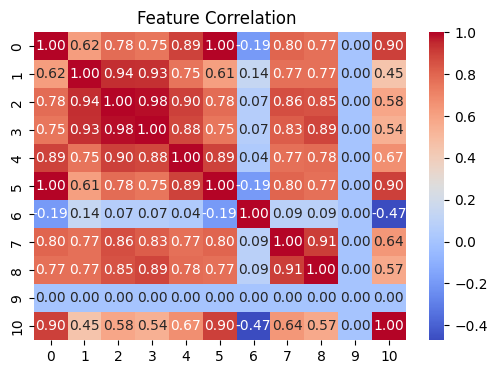

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' was your original DataFrame before cleaning
data_original = data.copy()  # Create a copy to preserve the original

# Print the actual column names in your DataFrame:
print(data_original.columns)

# Display correlation values
print(covariance_matrix_cleaned)

# Heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(covariance_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation ")
plt.show()

This heatmap represents the correlation matrix of different features. The color gradient helps visualize the strength and direction of correlations:

Red (closer to 1 or -1): Strong positive or negative correlation.
Blue (closer to 0): Weak or no correlation.

*HERE, Diagonal Values = 1.00:
1. This is expected because each feature is perfectly correlated with itself.
2. In this heatmap, values like 0.90, -0.90, and 0.67 indicate strong relationships.
3. Positive correlation (e.g., 0.90, 0.77) → Stock returns increase when the feature increases.
4. Negative correlation (e.g., -0.90, -0.75) → Stock returns decrease when the feature increases.

# * *Checking model overfitting on test data:*

In [ ]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, y_pred)
print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")


Train R²: 0.997, Test R²: 0.957


*It fits 95.7% on the test data:*

RESULTS:
1. 99.7% on training data → The model fits the training data almost perfectly.
2. 95.7% on test data → The model also performs well on unseen data.

# *Checking Overfitting by Cross validation R square*

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {scores}, Mean: {scores.mean():.3f}")


Cross-Validation R² Scores: [0.97340663 0.95489968 0.98433189 0.96248457 0.96833289], Mean: 0.969


1. High R² (~0.969): This model predicts the target variable very well.
2. Consistent Scores: There is low variance between folds, meaning the model is stable and generalizes well

# ***CONCLUSION/ RESULTS:***
PC1 is the most important principal component in this analysis, it is primarily influenced by "Real Total Return Price" and "Real TR Scaled Earnings", it means that these two features are driving most of the variance in the dataset.

Since, PC1 dominates then the principal component is capturing teh overall market performance trends.

"REAL TOTAL RETURN PRICE"-refers to the total return of an asset, adjusted for inflation.

"REAL TR SCALED EARNINGS"-represents real (inflation-adjusted) earnings scaled to a common metric, such as per-share earnings or indexed to a base year.

This model in predicting stock return predictions are heavily influenced by fundamental factors:
1.  Market Returns: This model is capturing broad market return trends rather than short-term price fluctuations.
2. Earnings Impact: A Strong correlation suggests that earnings growth plays a critical role in market performance.
3. Fundamental-Driven Model: the model is more aligned with value investing principles rather than purely technical analysis.

Since,
1. its High R² (~0.969): This model predicts the target variable very well.
2. Consistent Scores: There is low variance between folds, meaning the model is stable and generalizes well.
***Therefore, the model is performing strongly and should work good for unseen data***
